In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
tweets = pd.read_csv('twitter.csv')

In [89]:
tweets

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
tweets.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [23]:
# We wont be needing the id column anywhere so its good practice to drop unnecessary columns to aid computation process
tweets = tweets.drop(columns='id',axis=1)
tweets 

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?ðððððð...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

In [24]:
tweets['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

# Explore Dataset  

<AxesSubplot:>

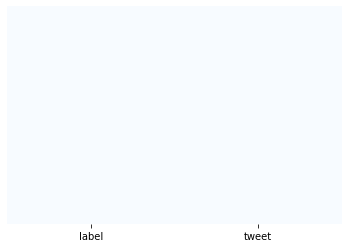

In [25]:
 sns.heatmap(tweets.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [26]:
# Here if we had any null values it would've showed as a different color on the heatmap 

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

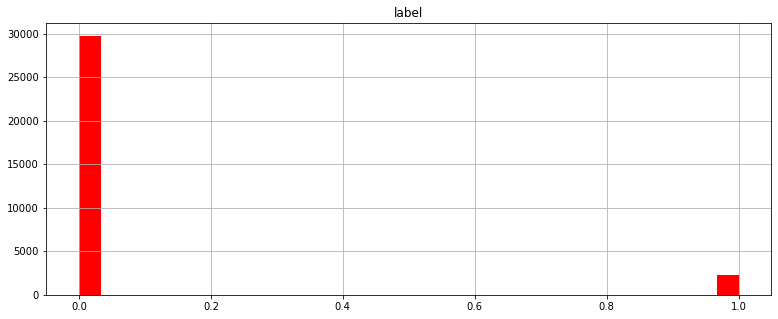

In [33]:
tweets.hist(bins = 30, figsize = (13,5), color = 'r')

In [28]:
# We have many 0 (non triggering/offensive) tweets and very few 1 (triggering/offensive) tweets. 
# Clearly our dataset is imbalanced 

### Similar figure could be plotted using seaborn

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

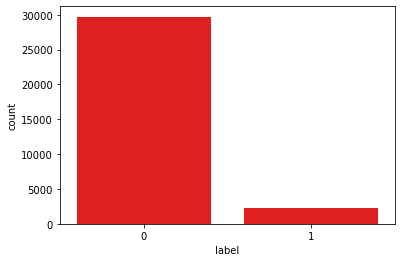

In [29]:
sns.countplot(tweets['label'],color='r')

In [30]:
# Calculating the exact number of tweets of both categories 

In [31]:
tweets[tweets['label']==1].count()

label    2242
tweet    2242
dtype: int64

In [32]:
tweets[tweets['label']==0].count()

label    29720
tweet    29720
dtype: int64

In [35]:
# Let's get the length of the messages
tweets['length'] = tweets['tweet'].apply(len)
tweets

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31960      1  @user #sikh #temple vandalised in in #calgary,...      67
31961      0                   thank you @user for you follow        32

[31962 rows x 3 columns]

<AxesSubplot:ylabel='Frequency'>

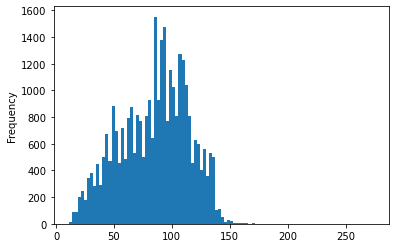

In [36]:
tweets['length'].plot(kind='hist',bins=100)

In [37]:
tweets.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     84.739628
std        0.255397     29.455749
min        0.000000     11.000000
25%        0.000000     63.000000
50%        0.000000     88.000000
75%        0.000000    108.000000
max        1.000000    274.000000

In [38]:
# Let's see the shortest message 
tweets[tweets['length'] == 11]['tweet'].iloc[0]

'i love you '

In [39]:
# Now the average length tweet
tweets[tweets['length'] == 84]['tweet'].iloc[0]

'my mom shares the same bihday as @user   bihday snake! see you this weekend ð\x9f\x99\x8cð\x9f\x8f¼'

In [40]:
positive = tweets[tweets['label']==0]

In [41]:
negative = tweets[tweets['label']==1]

In [42]:
positive 

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...      86
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?ðððððð...      68
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [43]:
negative 

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

# Plotting the Word Cloud 

In [44]:
sentences = tweets['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! ",
 ' â\x86\x9d #ireland consume

In [46]:
len(sentences)

31962

In [45]:
sentences_as_one_string = " ".join((sentences))
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

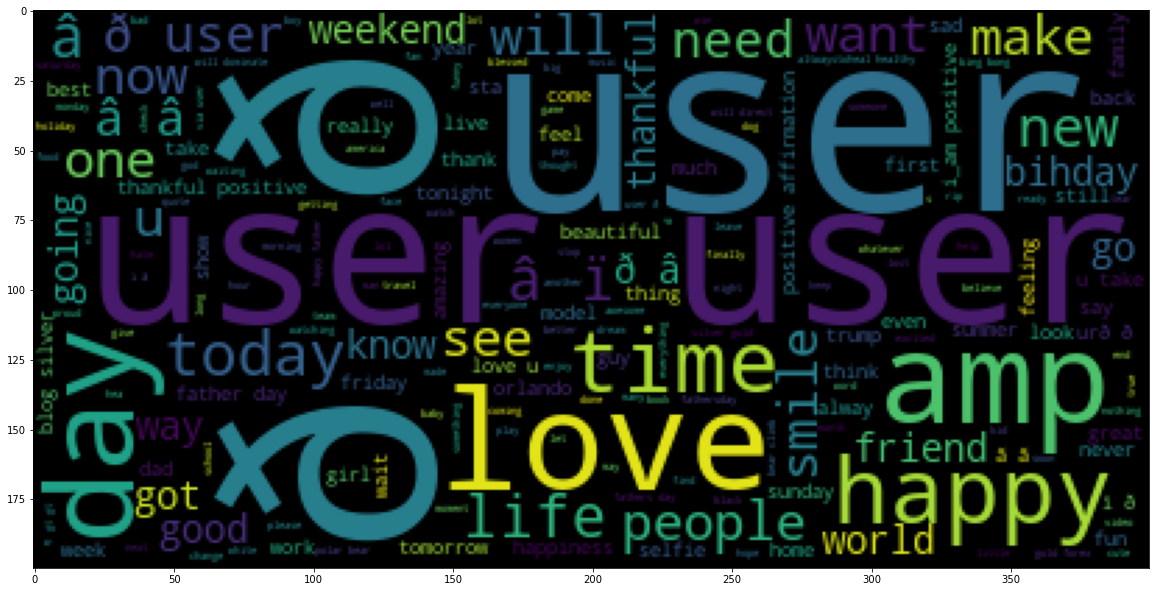

In [47]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [48]:
neg_sentence = negative['tweet'].tolist()
neg_sentence = " ".join((neg_sentence))
neg_sentence

'@user #cnn calls #michigan middle school \'build the wall\' chant \'\' #tcot   no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins retweet if you agree!  @user @user lumpy says i am a . prove it lumpy. it\'s unbelievable that in the 21st century we\'d need something like this. again. #neverump  #xenophobia  @user lets fight against  #love #peace  ð\x9f\x98©the white establishment can\'t have blk folx running around loving themselves and promoting our greatness   @user hey, white people: you can call people \'white\' by @user  #race  #identity #medâ\x80¦ how the #altright uses  &amp; insecurity to lure men into #whitesupremacy     @user i\'m not interested in a #linguistics that doesn\'t address #race &amp; . racism is about #power. #raciolinguistics bringsâ\x80¦ @user why not @user mocked obama for being black.  @user @user @user @user #brexit #people aren\'t protesting #trump because a #republican won-they do so because trump has fuhe

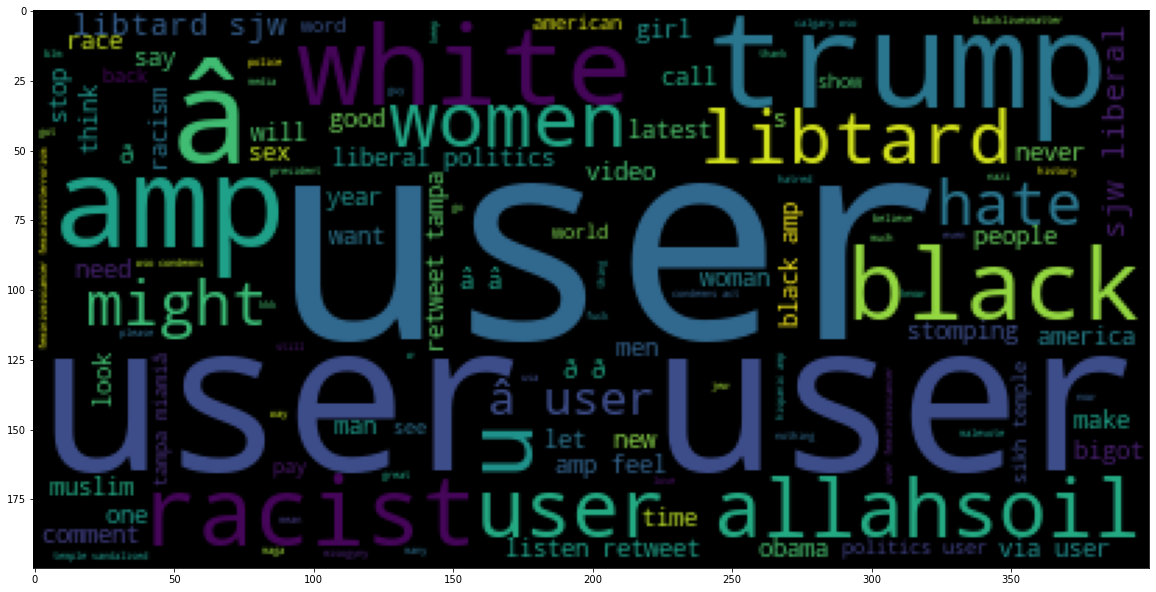

In [49]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentence))

# Data Cleaning - Removing punctuations and stopwords from text

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
import nltk             # Natural Language tool kit 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
# Let's define a function to clean up all the messages 
# The function performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]     # Removing punctuations 
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]    # Removing stopwords
    return Test_punc_removed_join_clean

In [60]:
tweets_clean = tweets['tweet'].apply(message_cleaning)

In [75]:
print('Original fifth tweet: {}'.format(tweets.iloc[5,1]))
print('Cleaned fifth tweet: {}'.format(tweets_clean[5]))

Original fifth tweet: [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
Cleaned fifth tweet: ['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


# Count vectorization explained using Example

![alt text](Sample.png "Title")

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(sample_data)

In [79]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [80]:
print(x.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


 # Count Vectorization (for actual code)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweets['tweet'])

In [77]:
print(vectorizer.get_feature_names())

['0', '0000001', '00027', '001', '0035', '00h30', '01', '0115', '0161', '019', '01926889917', '02', '0265', '0266808099', '02900', '03', '030916', '03111880779', '032', '033', '0345', '039', '04', '045', '04k', '05', '0506823156', '06', '06052016', '0606', '060616', '0608', '0608wed', '0609', '0610', '061116', '0612', '0613', '0616', '0617', '0618', '0618saturday7monthscouple', '0618â\x99¡', '0620', '06202016', '0622', '0624', '06Â', '07', '07000', '07040', '07044', '07150', '07190', '07400', '07468', '07500', '076', '07788427999', '07800', '07840', '07850', '07870', '07900', '07930', '07950', '08', '0806', '080616', '088b', '08â\x80¦', '09', '09062016', '0933m', '09600', '0k', '0shares', '0tolerancemovie', '0ð\x9f\x98¥â\x98¹ï¸\x8f', '1', '10', '100', '1000', '100000', '10003', '10007', '1000gifts', '1000th', '1000x', '1000yr', '1000â\x82¬', '1001', '1001000s', '10014', '10021', '10025', '10040', '100616', '10064', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100f

In [81]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [82]:
tweets_countvectorizer.shape

(31962, 47386)

In [86]:
x = pd.DataFrame(tweets_countvectorizer.toarray())
x

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

In [91]:
y = tweets['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957      0      0      0      0      0      0      0      0      0      0   
31958      0      0      0      0      0      0      0      0      0      0   
31959      0      0      0      0      0      0      0      0      0      0   
31960      0      0      0      0      0      0      0      0      0      0   
31961      0      0      0      0      0      0      0      0      0      0   

       ...  47376  47377  47378  47379  47380  47381  47382  47383  47384  \
0      ...      0      0      0      0      0      0      0      0      0   
1      ...      0      0      0      0      0      0      0      0      0   
2      ...      0      0      0      0      0      0      0      0      0   
3      ...      0      0      0      0      0      0      0      0      0   
4      ...      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
31957  ...      0      0      0      0      0      0      0      0      0   
31958  ...      0      0      0      0      0      0      0      0      0   
31959  ...      0      0      0      0      0      0      0      0      0   
31960  ...      0      0      0      0      0      0      0      0      0   
31961  ...      0      0      0      0      0      0      0      0      0   

       47385  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
31957      0  
31958      0  
31959      0  
31960      0  
31961      0  

[31962 rows x 47386 columns]

# Naive Bayes Classifier Model 

In [92]:
x.shape

(31962, 47386)

In [93]:
y.shape

(31962,)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [95]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

# Assess the model performance 

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

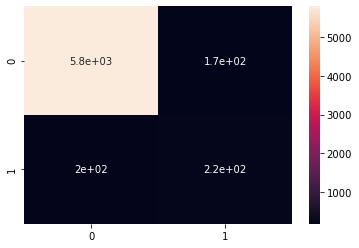

In [97]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5973
           1       0.56      0.52      0.54       420

    accuracy                           0.94      6393
   macro avg       0.76      0.75      0.76      6393
weighted avg       0.94      0.94      0.94      6393

